In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target


/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(3.94838,-0.751182,'0'),
  Text(-3.48871,-1.66226,'1'),
  Text(0.347295,-1.01602,'2'),
  Text(0.122996,-1.97931,'3'),
  Text(-0.394561,2.23015,'4'),
  Text(0.485048,-0.477362,'5'),
  Text(0.813562,-0.111822,'6'),
  Text(-1.19259,2.43097,'7'),
  Text(-0.226532,-0.77895,'8'),
  Text(-0.775889,2.32642,'9')])

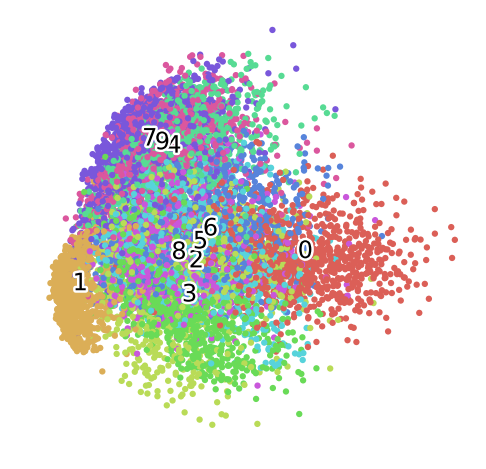

In [10]:
from sklearn.decomposition import PCA
index = np.random.permutation(X.shape[0])
X, y = X[index], y[index]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X[:10000])
fashion_scatter(pca_result,y[:10000])

(<Figure size 576x576 with 1 Axes>,
 [Text(47.0212,52.3463,'0'),
  Text(21.5046,-56.2948,'1'),
  Text(55.2868,-15.7592,'2'),
  Text(25.5258,11.0611,'3'),
  Text(-59.2821,-1.47192,'4'),
  Text(-7.48567,24.9994,'5'),
  Text(-12.8418,63.357,'6'),
  Text(-36.5288,-44.8424,'7'),
  Text(6.28355,-16.3479,'8'),
  Text(-42.0763,0.253069,'9')])

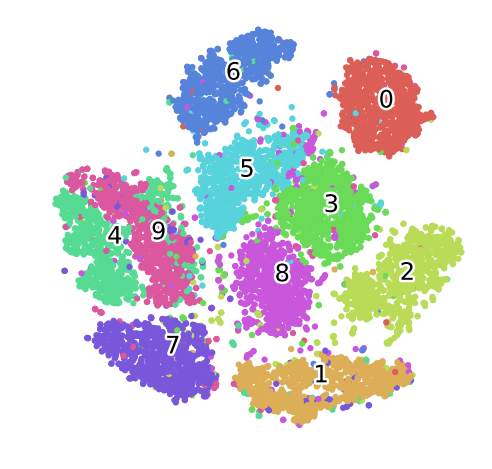

In [12]:
from sklearn.manifold import TSNE
fashion_tsne = TSNE(random_state=0).fit_transform(X[:10000])
fashion_scatter(fashion_tsne,y[:10000])

In [2]:
high_x = np.load('result/test_outputs.npy')
high_y = np.load('result/test_y.npy')

In [3]:
high_x.shape

(10000, 100)

(<Figure size 576x576 with 1 Axes>,
 [Text(15.2671,-2.86435,'0'),
  Text(-43.8285,-16.1398,'1'),
  Text(-2.55595,6.48734,'2'),
  Text(-2.90622,13.9503,'3'),
  Text(12.8437,-8.94948,'4'),
  Text(6.1518,16.5728,'5'),
  Text(14.5223,-6.88296,'6'),
  Text(13.8365,-1.15536,'7'),
  Text(-1.3414,3.84186,'8'),
  Text(21.3282,-1.98948,'9')])

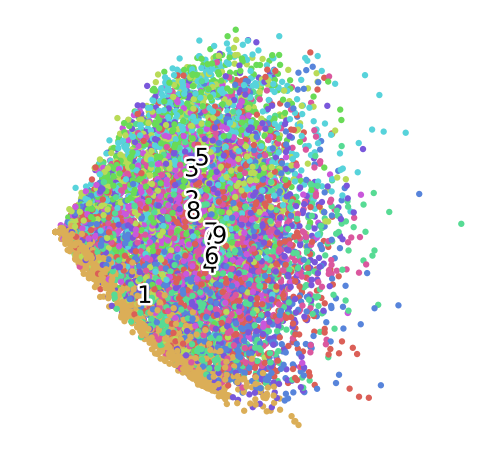

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(high_x)
fashion_scatter(pca_result,high_y)

(<Figure size 576x576 with 1 Axes>,
 [Text(10.9193,-11.5824,'0'),
  Text(36.1473,31.7956,'1'),
  Text(-16.9632,5.94344,'2'),
  Text(-30.9501,8.23235,'3'),
  Text(11.373,-11.7049,'4'),
  Text(-30.8067,-2.28791,'5'),
  Text(14.5848,-12.824,'6'),
  Text(0.844012,-9.9387,'7'),
  Text(-15.9435,6.3986,'8'),
  Text(-0.60367,-18.2395,'9')])

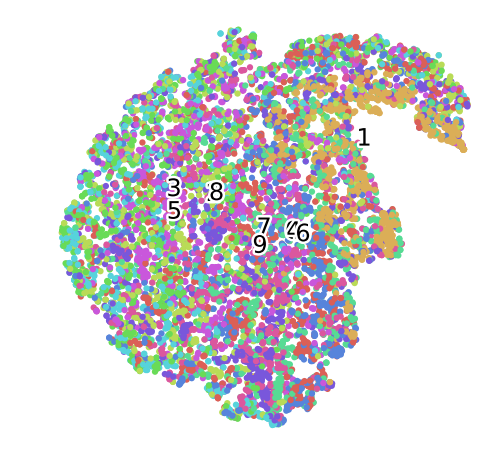

In [6]:
from sklearn.manifold import TSNE
fashion_tsne = TSNE(random_state=0).fit_transform(high_x)
fashion_scatter(fashion_tsne,high_y)